<a href="https://colab.research.google.com/github/gimnala/ProjectPage/blob/root/Final_%EC%9D%80%EC%84%B1%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

헬스케어소프트웨어응용 Final Project

1. CSV 파일 불러오기

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# For Google Colab
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/

# Load the dataset
# 다른 인코딩을 시도하여 데이터셋 불러오기
try:
    data = pd.read_csv('./헬스케어표준프로그래밍_기말/국민건강보험공단_건강검진정보_20221231.CSV', encoding='cp949')
except UnicodeDecodeError:
    try:
        data = pd.read_csv('./헬스케어표준프로그래밍_기말/국민건강보험공단_건강검진정보_20221231.CSV', encoding='euc-kr')
    except UnicodeDecodeError:
        data = pd.read_csv('./헬스케어표준프로그래밍_기말/국민건강보험공단_건강검진정보_20221231.CSV', encoding='latin1')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive


2. 데이터 전처리

In [2]:
#결측치의 개수 측정
print(data.isnull().sum())

기준년도                0
가입자일련번호             0
시도코드                0
성별                  0
연령대코드(5세단위)         0
신장(5cm단위)           0
체중(5kg단위)           0
허리둘레              392
시력(좌)             186
시력(우)             185
청력(좌)             115
청력(우)             116
수축기혈압            5556
이완기혈압            5556
식전혈당(공복혈당)       5611
총콜레스테롤         654382
트리글리세라이드       654386
HDL콜레스테롤       654386
LDL콜레스테롤       660926
혈색소              5616
요단백             11054
혈청크레아티닌          5615
혈청지오티(AST)       5613
혈청지피티(ALT)       5613
감마지티피            5611
흡연상태               96
음주여부               73
구강검진수검여부            0
치아우식증유무        655671
치석             655670
dtype: int64


In [3]:
#Handle missing values (결측치 처리)

#수치형 변수의 결측치는 평균으로 채워주기
num_mean = data.mean(numeric_only=True)
data.fillna(value=num_mean, inplace=True)

print(data.isnull().sum()) #여기에서 결측치를 다시 측정하면 더 이상 결측치가 없음을 알 수 있다. => 범주형 변수는 건들 필요 없음

기준년도           0
가입자일련번호        0
시도코드           0
성별             0
연령대코드(5세단위)    0
신장(5cm단위)      0
체중(5kg단위)      0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
혈청지오티(AST)     0
혈청지피티(ALT)     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
치아우식증유무        0
치석             0
dtype: int64


3. 모델 학습에 사용할 특징 선택

In [4]:
# 타겟 변수 'Hypertension' 정의 ('고혈압'과 '정상인'으로 라벨링)
data['Hypertension'] = data.apply(lambda row: '고혈압' if (row['수축기혈압'] >= 140) & (row['이완기혈압'] >= 90) else '정상인', axis=1)

# 모델을 위한 특징 선택
features = [
    '연령대코드(5세단위)', '성별', '신장(5cm단위)', '체중(5kg단위)', '허리둘레',
    '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '식전혈당(공복혈당)',
    '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
    '요단백'
]

X = data[features]
y = data['Hypertension']

4. 데이터 분할 및 모델 훈련

In [5]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest 분류기 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# 교차 검증 수행 (5-겹)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# 각 폴드에서의 정확도 출력
print("Cross-validation scores:", cv_scores)

# 평균 정확도 출력
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.944395 0.944355 0.9278   0.730155 0.58586 ]
Mean accuracy: 0.8265129999999999


5. 테스트 세트에 대해 예측하기

In [14]:
# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

In [15]:
정상_count = np.count_nonzero(y_pred == '정상인')
고혈압_count = np.count_nonzero(y_pred == '고혈압')

print(f"정상인 수: {정상_count}")
print(f"고혈압 환자 수: {고혈압_count}")
print(y_pred)

정상인 수: 199960
고혈압 환자 수: 40
['정상인' '정상인' '정상인' ... '정상인' '정상인' '정상인']


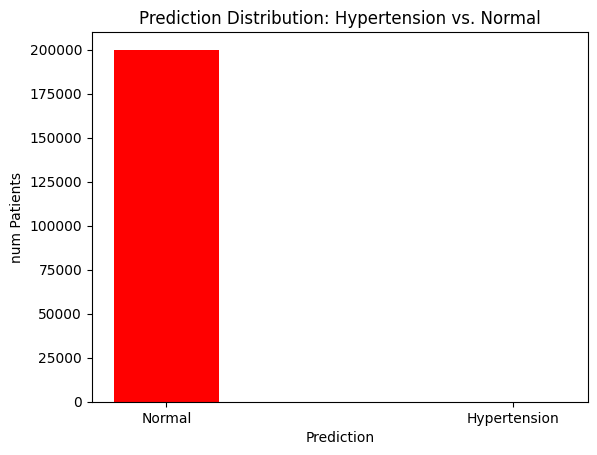

In [16]:
# y_pred에서 고혈압과 정상인의 분포 그래프 그리기

# 막대그래프 데이터 설정
categories = ['Normal', 'Hypertension']
counts = [정상_count, 고혈압_count]

# 막대그래프 생성
plt.bar(categories, counts, color=['red', 'green'], width=0.3)

# 그래프 제목 및 레이블 추가
plt.title('Prediction Distribution: Hypertension vs. Normal')
plt.xlabel('Prediction')
plt.ylabel('num Patients')

# 그래프 보여주기
plt.show()

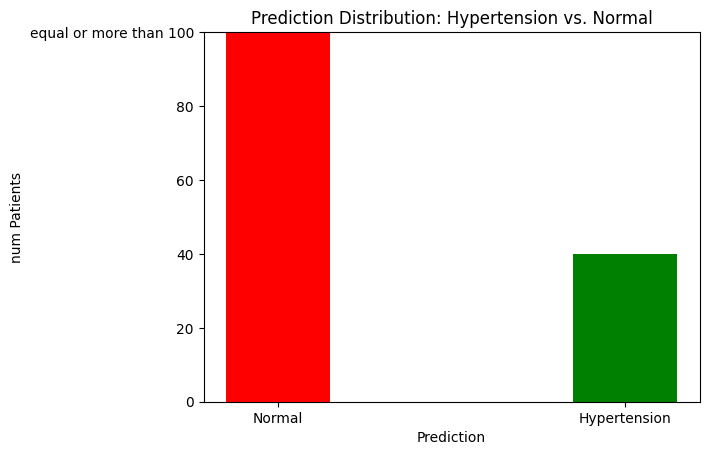

In [17]:
#Hypertension값이 너무 적어서 기준도를 조정해서 Hypertension도 보이게 해줄 것

from matplotlib.ticker import FuncFormatter

# 막대그래프 데이터 설정
categories = ['Normal', 'Hypertension']
counts = [정상_count, 고혈압_count]

# 막대그래프 생성
plt.bar(categories, counts, color=['red', 'green'], width=0.3)

# 그래프 제목 및 레이블 추가
plt.title('Prediction Distribution: Hypertension vs. Normal')
plt.xlabel('Prediction')
plt.ylabel('num Patients')

plt.ylim(0, 100)

# 사용자 정의 눈금 레이블 함수
def custom_ticks(x, pos):
    if x == 100:
        return "equal or more than 100"
    else:
        return int(x)

# 눈금 레이블 설정
formatter = FuncFormatter(custom_ticks)
plt.gca().yaxis.set_major_formatter(formatter)

# 그래프 보여주기
plt.show()

6. 모델 평가하기

In [18]:
# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.945155
Classification Report:
              precision    recall  f1-score   support

         고혈압       0.23      0.00      0.00     10947
         정상인       0.95      1.00      0.97    189053

    accuracy                           0.95    200000
   macro avg       0.59      0.50      0.49    200000
weighted avg       0.91      0.95      0.92    200000



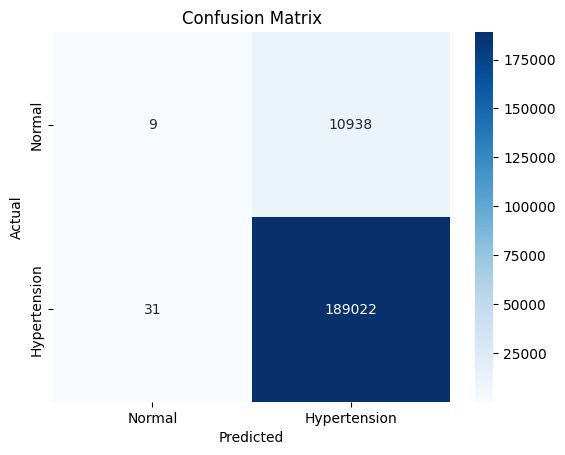

In [19]:
#혼동 행렬 시각화 => 모델의 성능을 더 자세하게 분석
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

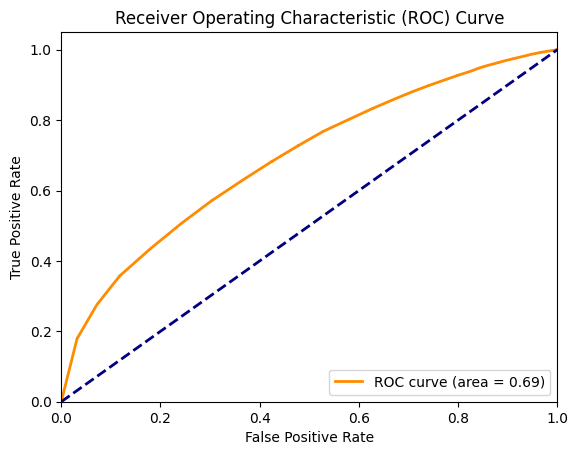

In [20]:
#ROC 곡선 시각화 => 모델의 분류 성능 평가
from sklearn.metrics import roc_curve

# ROC Curve 시각화
y_test_encoded = LabelEncoder().fit_transform(y_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba, pos_label=1)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()